In [4]:
fldr="J:/Master/Prediction-vf/UTKFace"
import os
files=os.listdir(fldr)
print(int(files[0].split('_')[0]))
print(files[0])

100
100_0_0_20170112213500903.jpg.chip.jpg


In [5]:
import cv2
ages=[]
genders=[]
images=[]

for i, fle in enumerate(files):
  age=int(fle.split('_')[0])
  gender=int(fle.split('_')[1])
  total=fldr+'/'+fle
  image=cv2.imread(total)

  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image= cv2.resize(image,(64,64))
  images.append(image)

In [6]:
for fle in files:
  age=int(fle.split('_')[0])
  gender=int(fle.split('_')[1])
  ages.append(age)
  genders.append(gender)

In [7]:
print(ages[24])
print(genders[24])
print(ages[53])
print(genders[53])

10
0
10
0


In [8]:
import numpy as np
images_f=np.array(images)
genders_f=np.array(genders)
ages_f=np.array(ages)
np.save('image.npy',images_f)
np.save('gender.npy',genders_f)
np.save('age.npy',ages_f)

In [9]:
values, counts = np.unique(genders_f, return_counts=True)
print(counts)

[12391 11317]


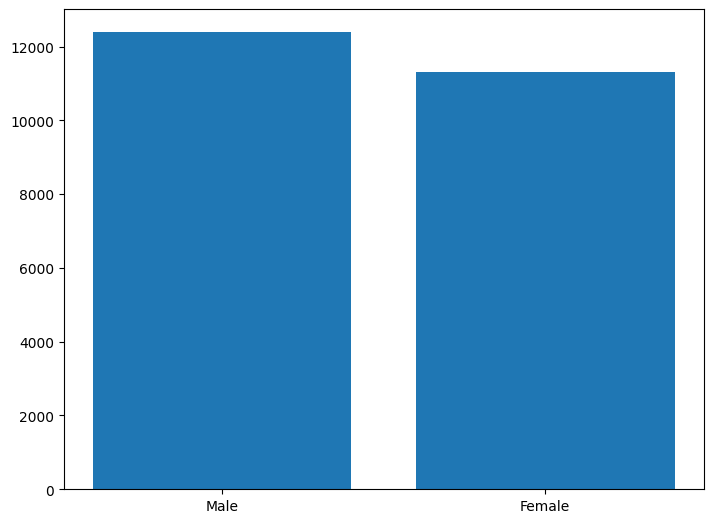

In [10]:
#pas fait
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
gender = ['Male', 'Female']
values=[12391, 11317]
ax.bar(gender,values)
plt.show()

In [11]:
values, counts = np.unique(ages_f, return_counts=True)
print(counts)

[1123  482  289  273  196  131  139  263  166  156   65  130   81  157
  177  247  158  262   98  284  346  395  426  859  734 2197  615  918
  570  724  350  664  143  409  880  483  293  325  266  526  132  266
  157  100  440  153  170  153  148  381  138  232  241  353  268  236
   97  271   82  293  161  125  103   50  259   77   94  100   56  147
   33   98   63   32  148   58   28   69   23  133   22   40   18   24
  155   35   10   34   33   82    2   13    5    9   17    9   11    2
    1    5    5    1    3    4]


In [12]:
val=values.tolist()
cnt=counts.tolist()

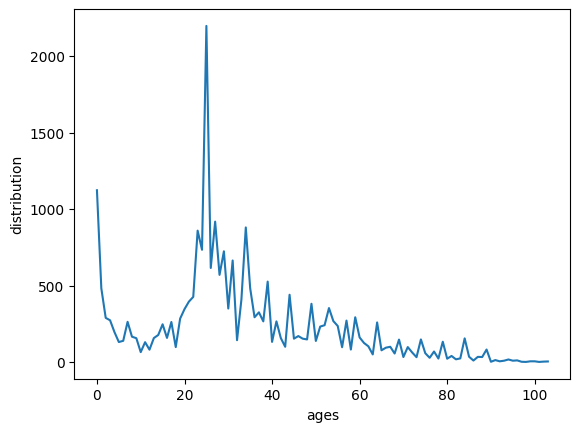

In [13]:
plt.plot(counts)
plt.xlabel('ages')
plt.ylabel('distribution')
plt.show()

In [14]:
labels=[]

i=0
while i<len(ages):
  label=[]
  label.append([ages[i]])
  label.append([genders[i]])
  labels.append(label)
  i+=1

In [15]:
images_f_2=images_f/255
labels_f=np.array(labels)
images_f_2.shape

(23708, 64, 64, 3)

In [16]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test= train_test_split(images_f_2, labels_f,test_size=0.25)

In [17]:
Y_train[0:5]

array([[[54],
        [ 0]],

       [[25],
        [ 0]],

       [[36],
        [ 0]],

       [[11],
        [ 0]],

       [[29],
        [ 1]]])

In [18]:
Y_train_2=[Y_train[:,1],Y_train[:,0]]
Y_test_2=[Y_test[:,1],Y_test[:,0]]

In [19]:
Y_train_2[0][0:5]

array([[0],
       [0],
       [0],
       [0],
       [1]])

In [20]:
Y_train_2[1][0:5]

array([[54],
       [25],
       [36],
       [11],
       [29]])

In [21]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten,BatchNormalization
from tensorflow.keras.layers import Dense, MaxPooling2D,Conv2D
from tensorflow.keras.layers import Input,Activation,Add
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

def Convolution(input_tensor,filters):
    
    x = Conv2D(filters=32,kernel_size=(3, 3),padding = 'same',kernel_regularizer=l2(0.01))(input_tensor)
    x = Dropout(0.2)(x)
    x= Activation('relu')(x)

    return x
def creationmodel(input_shape):
    inputs = Input((input_shape))
    
    conv_1= Convolution(inputs,64)
    maxp_1 = MaxPooling2D(pool_size = (2,2)) (conv_1)
    conv_2 = Convolution(maxp_1,32)
    maxp_2 = MaxPooling2D(pool_size = (2, 2)) (conv_2)
    conv_3 = Convolution(maxp_2,64)
    maxp_3 = MaxPooling2D(pool_size = (2, 2)) (conv_3)
    conv_4 = Convolution(maxp_3,512)
    maxp_4 = MaxPooling2D(pool_size = (2, 2)) (conv_4)
    flatten= Flatten() (maxp_4)
    dense_1= Dense(64,activation='relu')(flatten)
    dense_2= Dense(64,activation='relu')(flatten)
    drop_1=Dropout(0.2)(dense_1)
    drop_2=Dropout(0.2)(dense_2)
    output_1= Dense(1,activation="sigmoid",name='sex_out')(drop_1)
    output_2= Dense(1,activation="relu",name='age_out')(drop_2)
    model = Model(inputs=[inputs], outputs=[output_1,output_2])
    model.compile(loss=["binary_crossentropy","mae"], optimizer="Adam",
                  metrics={"sex_out": "accuracy", "age_out": "mae"})
    
    return model

In [22]:
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow as tf

In [23]:
fle_s='model_prediction.keras'
checkpointer = ModelCheckpoint(fle_s, monitor='val_loss',verbose=1,save_best_only=True,save_weights_only=False, mode='auto',save_freq='epoch')
Early_stop=tf.keras.callbacks.EarlyStopping(patience=80, monitor='val_loss',restore_best_weights=True),
callback_list=[checkpointer,Early_stop]

In [24]:
input_shape = (64, 64, 3)
model = creationmodel(input_shape)

In [25]:
#Sur ca
History=model.fit(X_train,Y_train_2,batch_size=64,validation_data=(X_test,Y_test_2),epochs=160,callbacks=[callback_list])

Epoch 1/160
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step - age_out_mae: 27.3567 - loss: 28.4970 - sex_out_accuracy: 0.5959
Epoch 1: val_loss improved from inf to 23.86401, saving model to model_prediction.keras
278/278 ━━━━━━━━━━━━━━━━━━━━ 84s 269ms/step - age_out_mae: 27.3353 - loss: 28.4748 - sex_out_accuracy: 0.5960 - val_age_out_mae: 23.0465 - val_loss: 23.8640 - val_sex_out_accuracy: 0.6484
Epoch 2/160
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step - age_out_mae: 15.3266 - loss: 16.1161 - sex_out_accuracy: 0.6275
Epoch 2: val_loss improved from 23.86401 to 22.51818, saving model to model_prediction.keras
278/278 ━━━━━━━━━━━━━━━━━━━━ 93s 308ms/step - age_out_mae: 15.3252 - loss: 16.1148 - sex_out_accuracy: 0.6276 - val_age_out_mae: 21.6929 - val_loss: 22.5182 - val_sex_out_accuracy: 0.6047
Epoch 3/160
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step - age_out_mae: 14.1285 - loss: 14.9112 - sex_out_accuracy: 0.6766
Epoch 3: val_loss improved from 22.51818 to 22.30186, saving model to model_pred

In [26]:
model.evaluate(X_test,Y_test_2)

186/186 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - age_out_mae: 6.8692 - loss: 7.7416 - sex_out_accuracy: 0.8671


[7.8669114112854, 6.996671199798584, 0.8638434410095215]

In [27]:
pred=model.predict(X_test)

186/186 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step


In [28]:
pred[1]

array([[54.956066],
       [59.40691 ],
       [27.858732],
       ...,
       [41.859737],
       [34.399105],
       [13.290163]], dtype=float32)

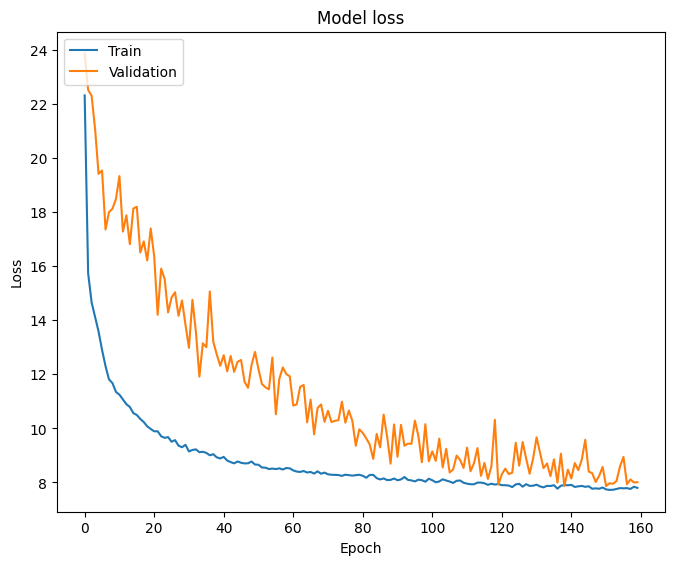

In [29]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.subplots_adjust(top=1.00, bottom=0.0, left=0.0, right=0.95, hspace=0.25,
                        wspace=0.35)

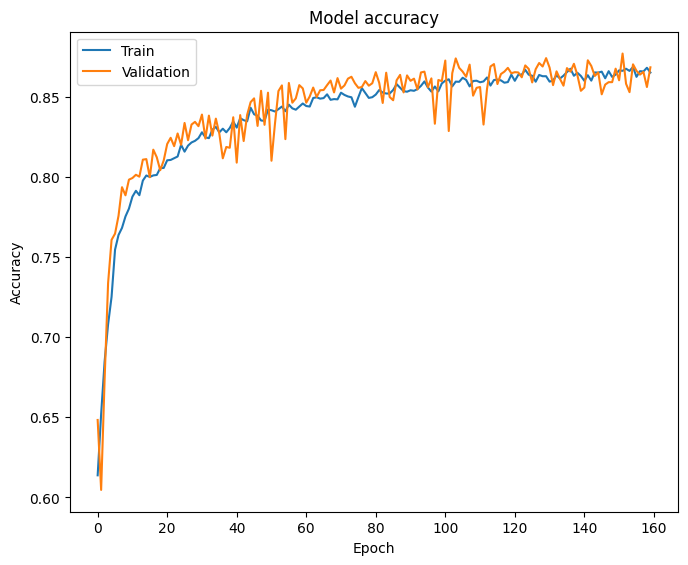

In [30]:
plt.plot(History.history['sex_out_accuracy'])
plt.plot(History.history['val_sex_out_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.subplots_adjust(top=1.00, bottom=0.0, left=0.0, right=0.95, hspace=0.25,
                        wspace=0.35)

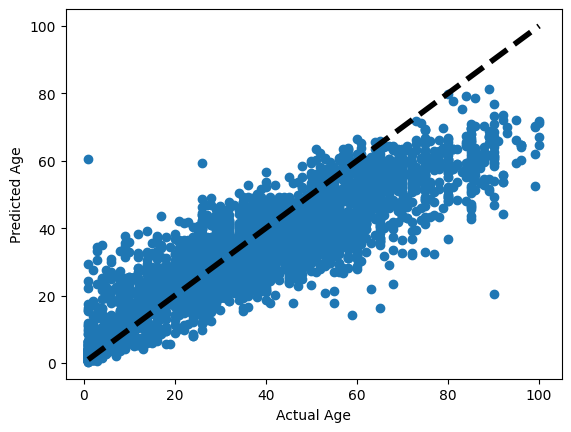

In [31]:
fig, ax = plt.subplots()
ax.scatter(Y_test_2[1], pred[1])
ax.plot([Y_test_2[1].min(),Y_test_2[1].max()], [Y_test_2[1].min(), Y_test_2[1].max()], 'k--', lw=4)
ax.set_xlabel('Actual Age')
ax.set_ylabel('Predicted Age')
plt.show()

In [40]:
i=0
Pred_l=[]
while(i<len(pred[0])):

  Pred_l.append(int(np.round(pred[0][i])))
  i+=1

C:\Users\owner\AppData\Local\Temp\ipykernel_144\3137143806.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Pred_l.append(int(np.round(pred[0][i])))


In [41]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report
report=classification_report(Y_test_2[0], Pred_l)
print(report)

              precision    recall  f1-score   support

           0       0.85      0.91      0.87      3106
           1       0.89      0.82      0.85      2821

    accuracy                           0.86      5927
   macro avg       0.87      0.86      0.86      5927
weighted avg       0.87      0.86      0.86      5927



<Axes: >

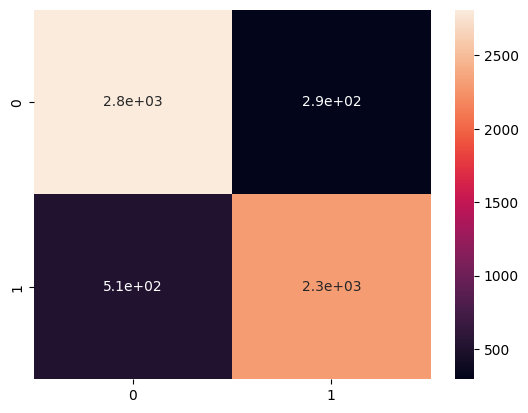

In [42]:
import seaborn as sns
results = confusion_matrix(Y_test_2[0], Pred_l)
sns.heatmap(results, annot=True)

In [50]:
from tensorflow.keras.models import load_model
model=load_model('J:/Master/Prediction-vf/model_prediction.keras')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Predicted Age: 24
Predicted Sex: Female


C:\Users\owner\AppData\Local\Temp\ipykernel_144\252182719.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  age = int(np.round(pred_1[1][0]))
C:\Users\owner\AppData\Local\Temp\ipykernel_144\252182719.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sex = int(np.round(pred_1[0][0]))


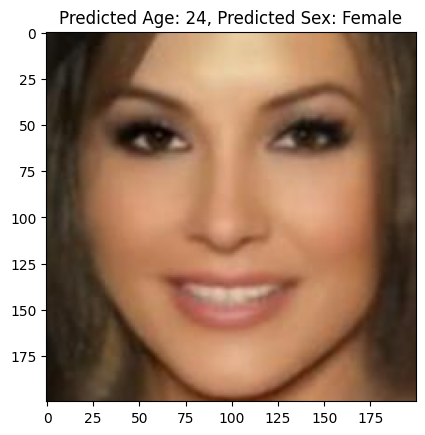

In [54]:
def test_image(ind, images_f, images_f_2, model):
    # Display the image
    plt.imshow(images_f[ind])
    # Prepare the image for prediction
    image_test = images_f_2[ind]
    # Predict
    pred_1 = model.predict(np.array([image_test]))
    # Extract predicted age and sex
    sex_f = ['Male', 'Female']
    age = int(np.round(pred_1[1][0]))
    sex = int(np.round(pred_1[0][0]))
    # Print predictions
    print("Predicted Age: " + str(age))
    print("Predicted Sex: " + sex_f[sex])
    # Display the image with title
    plt.title(f'Predicted Age: {age}, Predicted Sex: {sex_f[sex]}')
    plt.show()
# Example usage
img = cv2.imread('J:/Master/Prediction-vf/22_1_4_20170103223649399.jpg.chip.jpg')
img = cv2.resize(img, (64, 64))
img = np.reshape(img, [64, 64, 3]) / 255.0
# Prediction
pred_1 = model.predict(np.array([img]))
# Extract predicted age and sex
sex_f = ['Male', 'Female']
age = int(np.round(pred_1[1][0]))
sex = int(np.round(pred_1[0][0]))
# Print predictions
print("Predicted Age: " + str(age))
print("Predicted Sex: " + sex_f[sex])
# Display the image with title
images = cv2.imread('J:/Master/Prediction-vf/22_1_4_20170103223649399.jpg.chip.jpg')
images = cv2.cvtColor(images, cv2.COLOR_BGR2RGB)
plt.imshow(images)
plt.title(f'Predicted Age: {age}, Predicted Sex: {sex_f[sex]}')
plt.show()